In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize, interpolate, fft
rng = np.random.default_rng()

def f(x):
    return np.exp(-x**2)/(np.sqrt(2*np.pi))

def g(x):
    return x**3 - 3*x + 1


N_samp = 39
x = np.linspace(-1.5, 1.5, 500)
x_samp = rng.uniform(low=-1.5, high=1.5, size=N_samp)
min_x, max_x = min(x_samp), max(x_samp)
approx_x = np.linspace(min_x, max_x, N_samp)


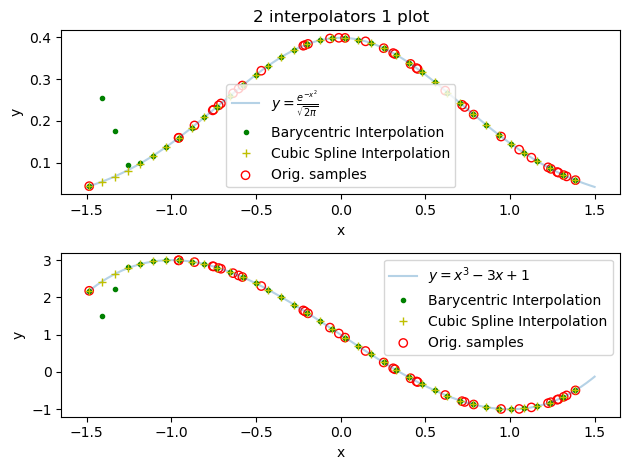

In [2]:
def lineinterp(x, y):
    k = interpolate.interp1d(x, y, kind='linear')
    return k

def bary(x, y):
    k = interpolate.BarycentricInterpolator(x, y)
    return k

def cubspline(x, y):
    k = interpolate.CubicSpline(x, y)
    return k

fig, ax = plt.subplots(2, 1)
ax[0].set_title("2 interpolators 1 plot")
ax[0].plot(x, f(x), label=r"$y = \frac{e^{-x^2}}{\sqrt{2\pi}}$", alpha=0.33)
ax[0].plot(approx_x, bary(x_samp, f(x_samp))(approx_x), "g.", label="Barycentric Interpolation")
ax[0].plot(approx_x, cubspline(np.sort(x_samp), f(np.sort(x_samp)))(approx_x), "y+", label="Cubic Spline Interpolation")
ax[0].scatter(x_samp, f(x_samp), facecolors='none', edgecolor='red', label="Orig. samples")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].legend()
ax[1].plot(x, g(x), label=r"$y = x^3 - 3x + 1$", alpha=0.33)
ax[1].plot(approx_x, bary(x_samp, g(x_samp))(approx_x), "g.", label="Barycentric Interpolation")
ax[1].plot(approx_x, cubspline(np.sort(x_samp), g(np.sort(x_samp)))(approx_x), "y+", label="Cubic Spline Interpolation")
ax[1].scatter(x_samp, g(x_samp), facecolors='none', edgecolor='red', label="Orig. samples")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].legend()
fig.tight_layout()


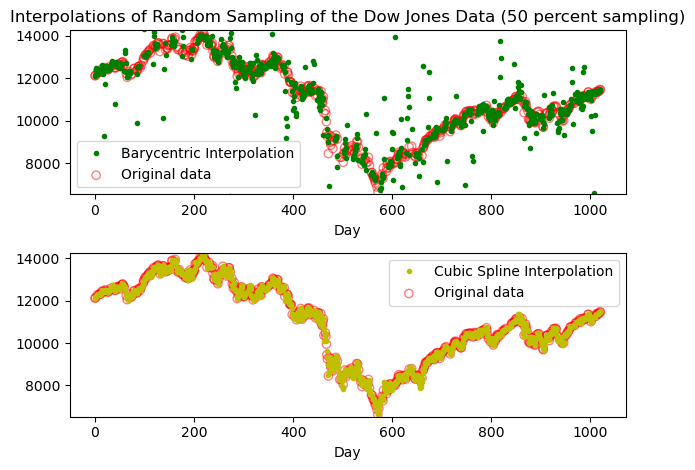

In [82]:
dow_data = np.loadtxt("dow.txt")
def modifiedbary(x, y, approx_x):
    i = 0
    array = []
    piece = 9
    piece1 = int((len(approx_x)*piece)/len(x))
    while i <= int(len(x)/piece):    
        if piece*(i+1) < len(x):
            xpart, ypart = x[piece*i:piece*(i+1)], y[piece*i:piece*(i+1)]
            k = interpolate.BarycentricInterpolator(xpart, ypart)
            array.append(k(approx_x[piece1*i:piece1*(i+1)]).tolist())
        else:
            xpart, ypart = x[piece*i:len(x)], y[piece*i:len(x)]
            k = interpolate.BarycentricInterpolator(xpart, ypart)
            array.append(k(approx_x[piece1*i:len(approx_x)]).tolist())
        i += 1   
    flat = [item for sublist in array for item in sublist]
    return np.array(flat).reshape(len(approx_x))

def plotter(dow_data, sampling):
    num_points = int(len(dow_data)*(sampling))
    x = rng.choice(range(len(dow_data)), size = num_points, replace = False)
    xsort = np.sort(x)
    y = dow_data[x]
    ysort = dow_data[xsort]
    min_x, max_x = min(x), max(x)
    approx_x = np.linspace(min_x, max_x, len(dow_data))
    fig, ax = plt.subplots(2,1)
    ax[0].set_title("Interpolations of Random Sampling of the Dow Jones Data (%s percent sampling)" %str(int(sampling*100)))
    ax[0].plot(approx_x, modifiedbary(xsort, ysort, approx_x), "g.", label="Barycentric Interpolation")
    ax[0].scatter(x, y, facecolors='none', edgecolor='red', label="Original data", alpha=0.5)
    ax[0].set_xlabel("Day")
    ax[0].set_ylim(min(y)-100, max(y)+100)
    ax[0].legend()
    ax[1].plot(approx_x, cubspline(xsort, ysort)(approx_x), "y.", label="Cubic Spline Interpolation")
    ax[1].scatter(x, y, facecolors='none', edgecolor='red', label="Original data", alpha=0.5)
    ax[1].set_xlabel("Day")
    ax[1].set_ylim(min(y)-100, max(y)+100)
    ax[1].legend()
    fig.tight_layout()
plotter(dow_data, 0.5)


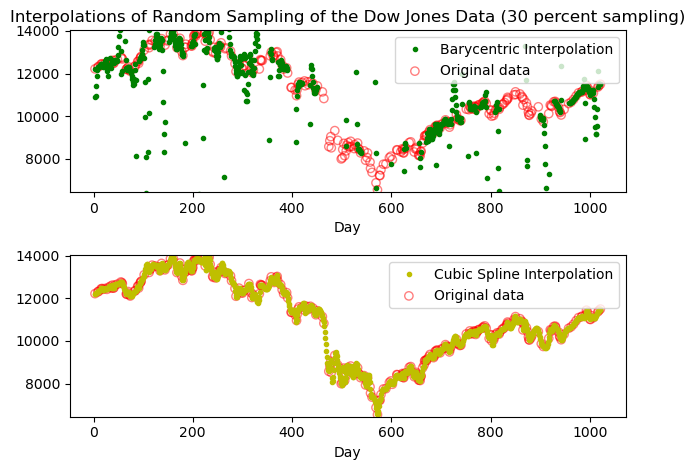

In [84]:
plotter(dow_data, 0.3)

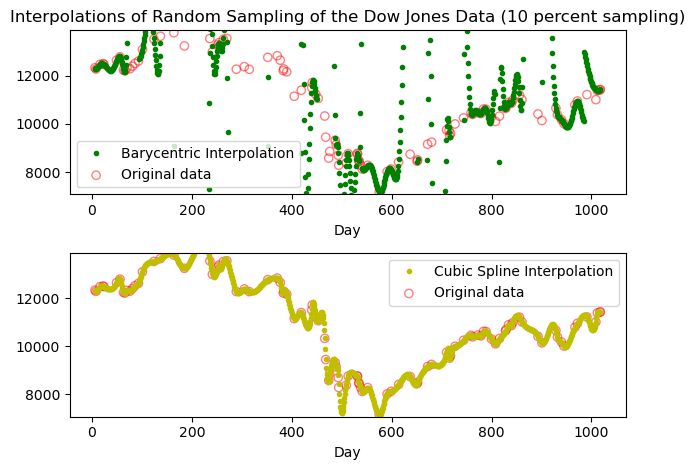

In [86]:
plotter(dow_data, 0.1)

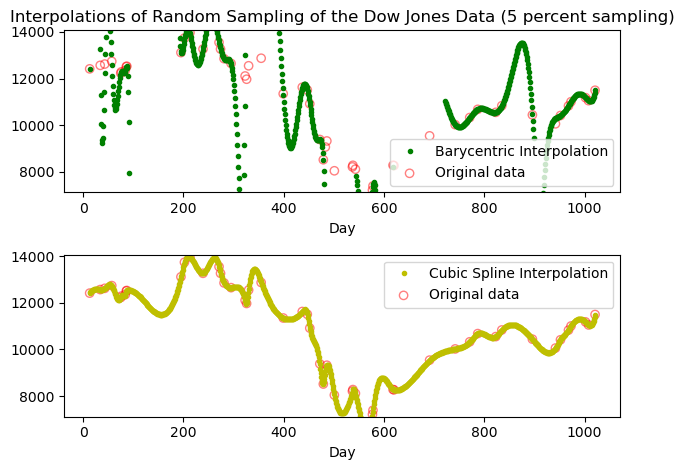

In [88]:
plotter(dow_data, 0.05)

In [16]:
x = [[1, 2, 3], [4], [5, 6, 7, 8], [9,10]]
flatx = [item for sublist in x for item in sublist]
flatx

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]